In [2]:
import pandas as pd
#!pip install pandas_datareader to validate crypto pricing with specific date
import pandas_datareader as web
import datetime as dt
from datetime import date

import seaborn as sns
from numerize import numerize
import matplotlib.patches as patches
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
#identify specific date to extract
start = dt.datetime(2021,10,1)
end = dt.datetime(2022,6,30)

In [4]:
#extract data from yahoo finance
MANA = web.DataReader('MANA-USD','yahoo', start, end)
ENJ = web.DataReader('ENJ-USD','yahoo', start, end)
RACA = web.DataReader('RACA-USD','yahoo', start, end)
ETH = web.DataReader('ETH-USD','yahoo', start, end)
BTC = web.DataReader('BTC-USD','yahoo', start, end)
BNB = web.DataReader('BNB-USD','yahoo', start, end)

In [5]:
MANA = MANA.reset_index()
ENJ = ENJ.reset_index()
RACA = RACA.reset_index()
ETH = ETH.reset_index()
BTC = BTC.reset_index()
BNB = BNB.reset_index()

In [6]:
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}

In [7]:
def get_charts(data, title):
    plt.rc('figure', figsize=(15, 10))
    
    fig, axes = plt.subplots(2, 1, 
                gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)
    fig.suptitle(title, fontsize=16)
    
    date = data['Date']
    close = data['Close']
    vol = data['Volume']
    
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], 
    linewidth=2, label='Price')
    plot_price.set_ylabel('Price (in USD)', fontsize=14)
    plot_price.set_xlabel('Date', fontsize=14)
    
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=15, color='darkgrey')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Volume (in millions)', fontsize=14)
    
    get_percent('MANA', data)

In [8]:
def get_percent(symbol, data):
    data_percent = (data['Close'].max()/data['Close'].min())*100
    print('{0} : {1:.2f}%'.format(symbol, data_percent))

             High         Low        Open       Close        Volume  \
count  274.000000  274.000000  274.000000  274.000000  2.740000e+02   
mean     2.391116    2.140316    2.264325    2.261939  1.012794e+09   
std      1.166910    1.016601    1.090888    1.084572  2.192741e+09   
min      0.697392    0.630659    0.645685    0.688232  5.031446e+07   
25%      1.123749    0.979797    1.043768    1.043780  2.469940e+08   
50%      2.531971    2.352757    2.436200    2.436335  4.583188e+08   
75%      3.254275    2.851249    3.030986    3.027330  9.435900e+08   
max      5.902317    4.820426    5.199132    5.479181  2.757404e+10   

        Adj Close  
count  274.000000  
mean     2.261939  
std      1.084572  
min      0.688232  
25%      1.043780  
50%      2.436335  
75%      3.027330  
max      5.479181  
MANA : 796.12%


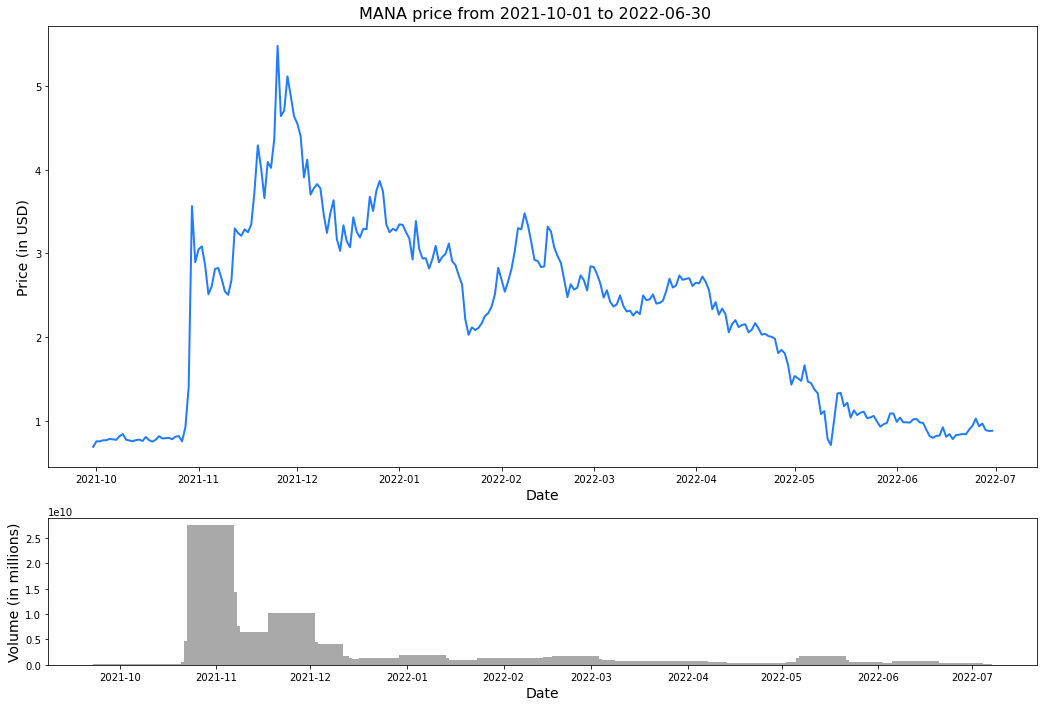

In [9]:
print(MANA.describe())
get_charts(MANA, 'MANA price from {0} to {1}'.format(start.date(), end.date()))

             High         Low        Open       Close        Volume  \
count  274.000000  274.000000  274.000000  274.000000  2.740000e+02   
mean     1.881220    1.691444    1.787622    1.783909  2.709695e+08   
std      0.936127    0.812135    0.871919    0.874009  2.994435e+08   
min      0.445830    0.382428    0.413542    0.413635  5.451404e+07   
25%      1.349809    1.281853    1.310309    1.310247  1.219936e+08   
50%      1.713432    1.575437    1.647323    1.649320  1.738283e+08   
75%      2.529602    2.284604    2.374941    2.376410  2.865862e+08   
max      4.846962    4.041790    4.490583    4.685819  2.091436e+09   

        Adj Close  
count  274.000000  
mean     1.783909  
std      0.874009  
min      0.413635  
25%      1.310247  
50%      1.649320  
75%      2.376410  
max      4.685819  
MANA : 1132.84%


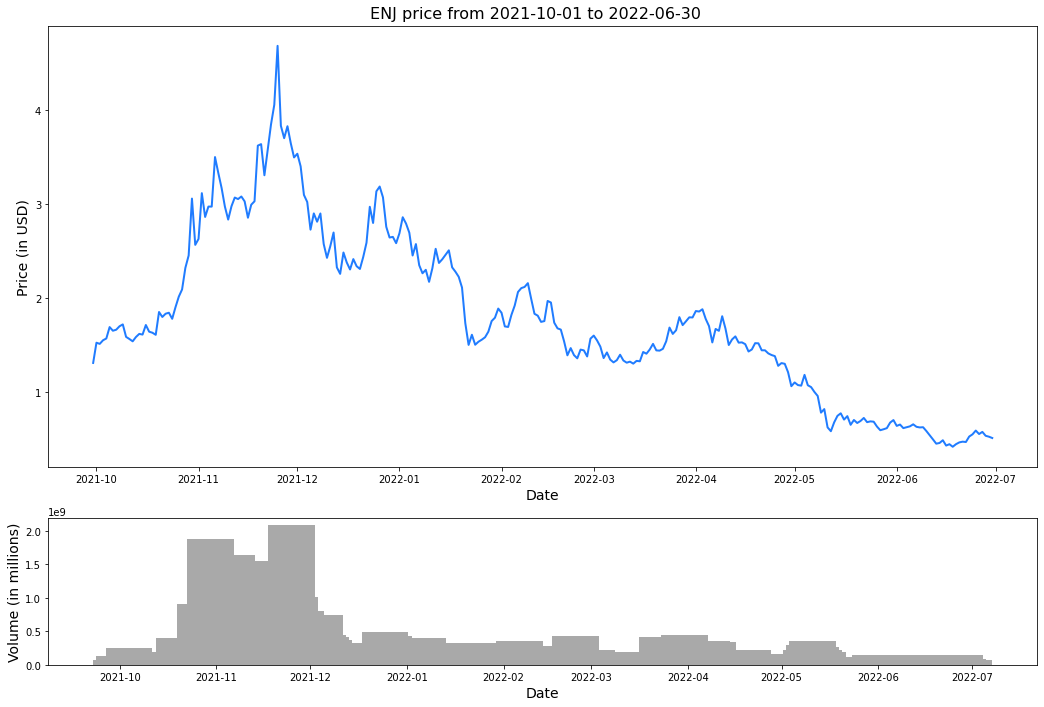

In [11]:
print(ENJ.describe())
get_charts(ENJ, 'ENJ price from {0} to {1}'.format(start.date(), end.date()))

             High         Low        Open       Close        Volume  \
count  274.000000  274.000000  274.000000  274.000000  2.740000e+02   
mean     0.002486    0.002133    0.002312    0.002314  7.982857e+07   
std      0.002153    0.001767    0.001975    0.001979  8.773019e+07   
min      0.000353    0.000315    0.000334    0.000334  1.007185e+07   
25%      0.001197    0.001008    0.001140    0.001140  2.678673e+07   
50%      0.001977    0.001785    0.001856    0.001856  4.217160e+07   
75%      0.002722    0.002383    0.002553    0.002553  8.908392e+07   
max      0.011887    0.009966    0.011414    0.011415  4.668736e+08   

        Adj Close  
count  274.000000  
mean     0.002314  
std      0.001979  
min      0.000334  
25%      0.001140  
50%      0.001856  
75%      0.002553  
max      0.011415  
MANA : 3417.66%


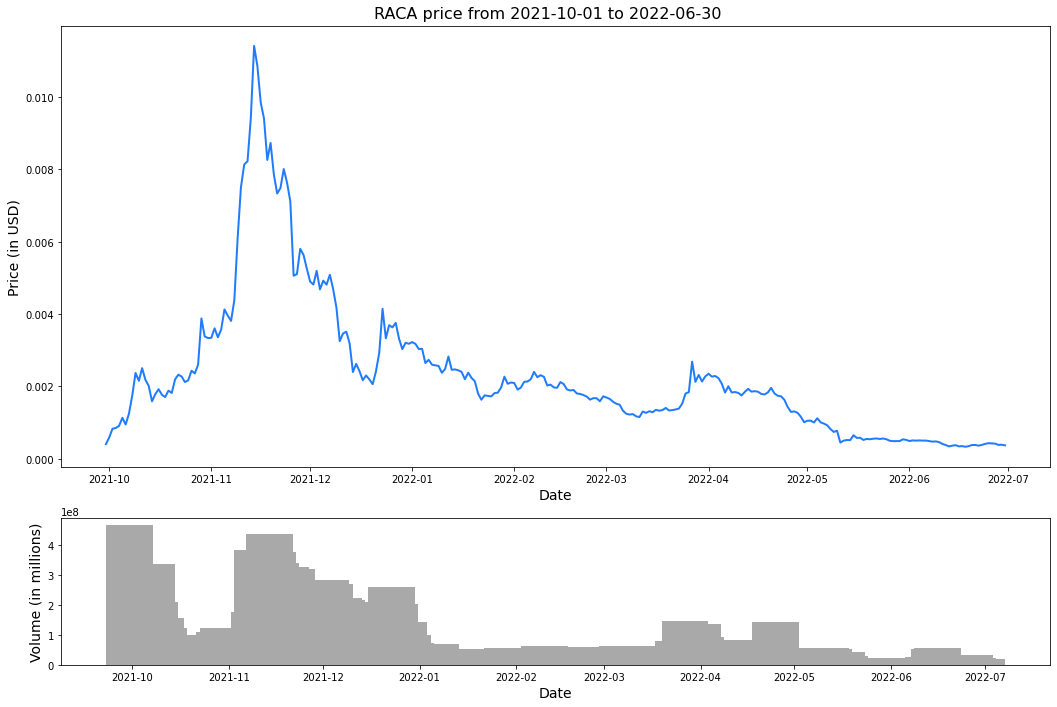

In [12]:
print(RACA.describe())
get_charts(RACA, 'RACA price from {0} to {1}'.format(start.date(), end.date()))

               High           Low          Open         Close        Volume  \
count    274.000000    274.000000    274.000000    274.000000  2.740000e+02   
mean   44315.059071  42255.651203  43377.858776  43281.763779  3.095088e+10   
std    11567.348240  11152.026010  11321.373004  11395.782767  9.934513e+09   
min    20141.160156  17708.623047  19010.902344  19017.642578  1.373656e+10   
25%    38678.249023  36758.363281  37721.952148  37711.057617  2.478451e+10   
50%    43062.931641  41523.625000  42323.228516  42323.236328  3.035814e+10   
75%    50896.430664  48013.750977  49939.426758  49915.963867  3.603383e+10   
max    68789.625000  66382.062500  67549.734375  67566.828125  8.419661e+10   

          Adj Close  
count    274.000000  
mean   43281.763779  
std    11395.782767  
min    19017.642578  
25%    37711.057617  
50%    42323.236328  
75%    49915.963867  
max    67566.828125  
MANA : 355.28%


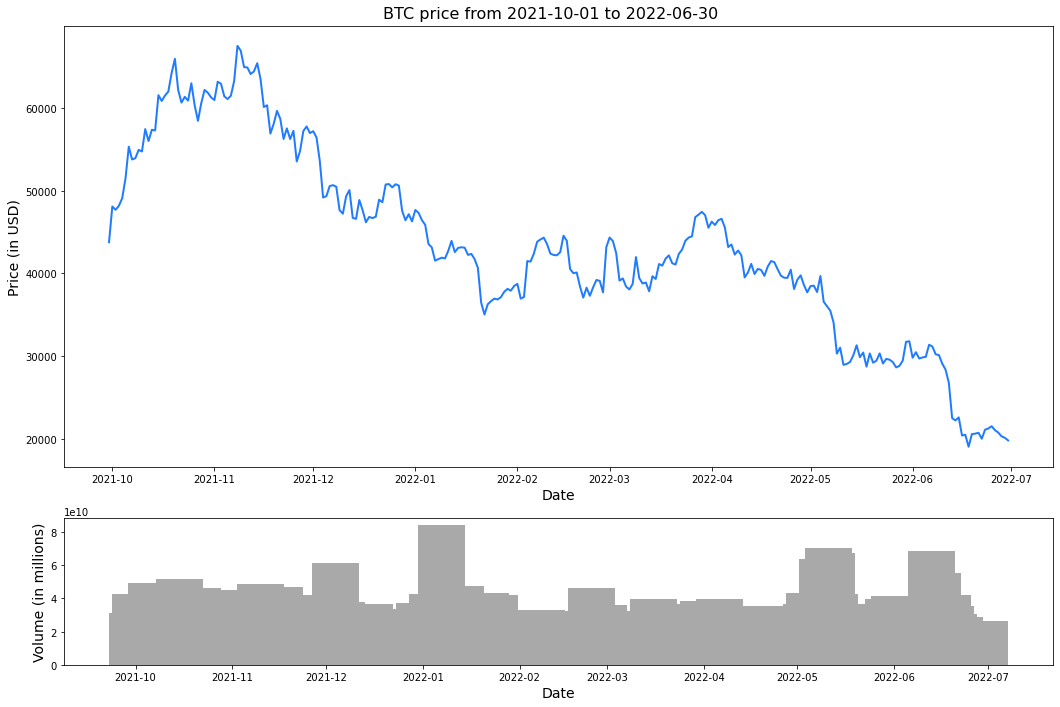

In [13]:
print(BTC.describe())
get_charts(BTC, 'BTC price from {0} to {1}'.format(start.date(), end.date()))

              High          Low         Open        Close        Volume  \
count   274.000000   274.000000   274.000000   274.000000  2.740000e+02   
mean   3177.710262  2997.217159  3096.202456  3088.189561  1.760330e+10   
std     951.085890   910.449992   928.576221   934.929062  6.045849e+09   
min    1095.166870   896.109009   993.400635   993.636780  6.532997e+09   
25%    2662.886841  2511.950500  2588.791931  2580.150574  1.380275e+10   
50%    3156.250488  3001.015747  3077.621216  3077.614014  1.654828e+10   
75%    3975.687256  3726.355530  3864.812744  3858.752197  2.031267e+10   
max    4891.704590  4718.039062  4810.071289  4812.087402  4.574340e+10   

         Adj Close  
count   274.000000  
mean   3088.189561  
std     934.929062  
min     993.636780  
25%    2580.150574  
50%    3077.614014  
75%    3858.752197  
max    4812.087402  
MANA : 484.29%


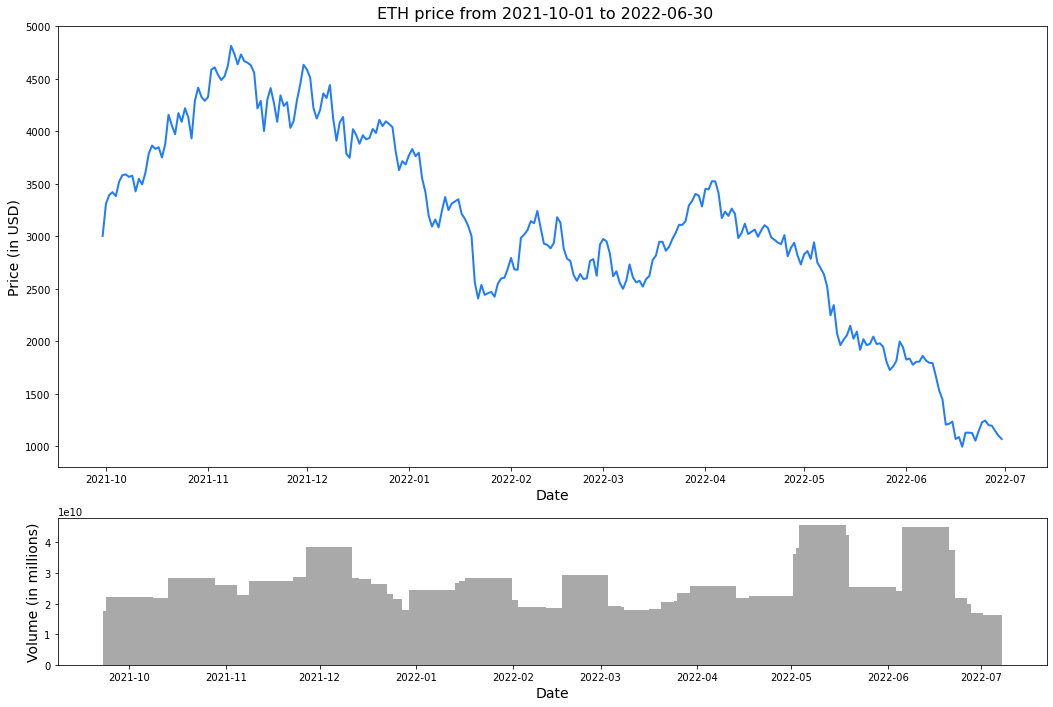

In [14]:
print(ETH.describe())
get_charts(ETH, 'ETH price from {0} to {1}'.format(start.date(), end.date()))

             High         Low        Open       Close        Volume  \
count  274.000000  274.000000  274.000000  274.000000  2.740000e+02   
mean   438.837751  414.235102  427.870972  427.075741  2.022116e+09   
std    108.414013  103.364639  105.939109  106.240051  7.844899e+08   
min    216.082474  184.540054  196.955795  197.042999  7.796033e+08   
25%    384.557526  361.567879  373.504303  373.509308  1.471114e+09   
50%    424.304977  406.232178  415.559280  415.519516  1.883156e+09   
75%    512.754639  488.230598  500.637421  500.372223  2.310657e+09   
max    669.345825  634.549500  654.000366  654.315002  5.149147e+09   

        Adj Close  
count  274.000000  
mean   427.075741  
std    106.240051  
min    197.042999  
25%    373.509308  
50%    415.519516  
75%    500.372223  
max    654.315002  
MANA : 332.07%


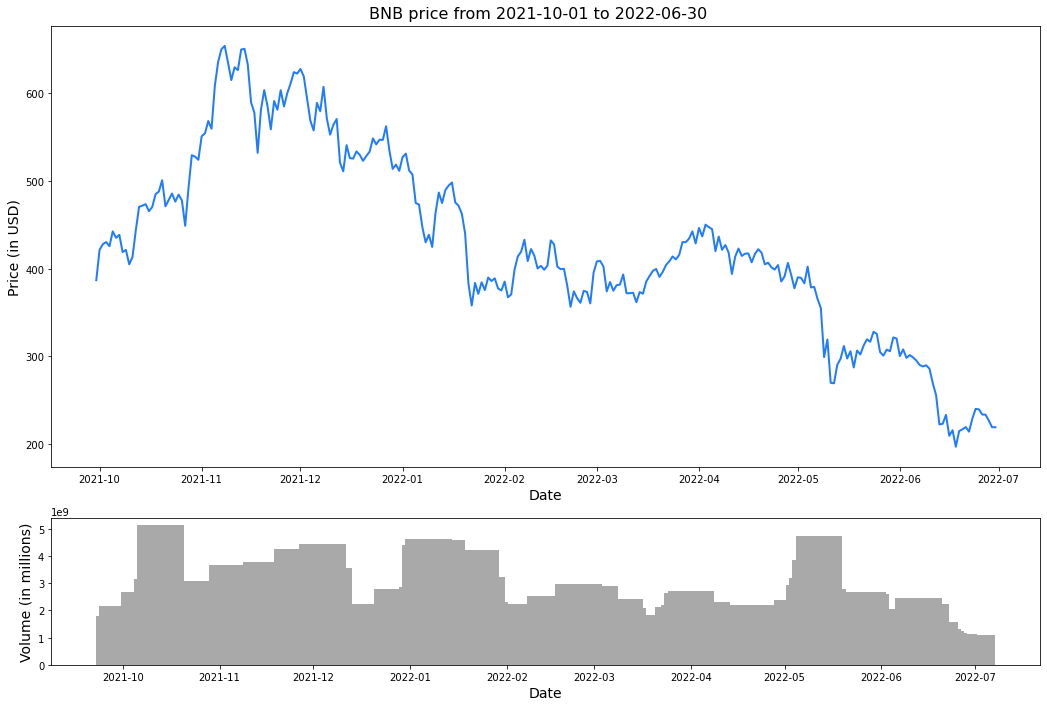

In [15]:
print(BNB.describe())
get_charts(BNB, 'BNB price from {0} to {1}'.format(start.date(), end.date()))